NonLinerregression


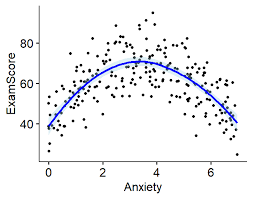

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [14]:
!wget https://raw.githubusercontent.com/valixonov04/DATA/2a5af24a047302f954572119ca754082fd546c07/gdp.csv

--2025-01-03 12:21:50--  https://raw.githubusercontent.com/valixonov04/DATA/2a5af24a047302f954572119ca754082fd546c07/gdp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1218 (1.2K) [text/plain]
Saving to: ‘gdp.csv’

gdp.csv             100%[===================>]   1.19K  --.-KB/s    in 0s      

2025-01-03 12:21:50 (15.5 MB/s) - ‘gdp.csv’ saved [1218/1218]



In [15]:
# Read the CSV file
df = pd.read_csv('/content/gdp.csv')

# Display the first few rows of the dataframe
print(df.head())


   Year         Value
0  1960  5.918412e+10
1  1961  4.955705e+10
2  1962  4.668518e+10
3  1963  5.009730e+10
4  1964  5.906225e+10


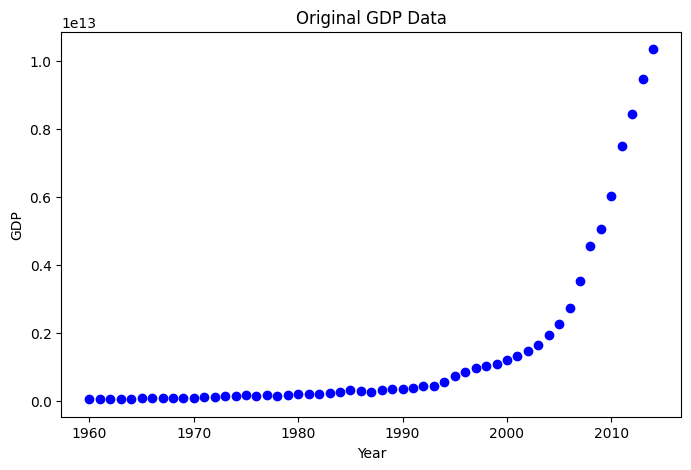

In [16]:
plt.figure(figsize=(8, 5))
x_original, y_original = df["Year"].values, df["Value"].values
plt.plot(x_original, y_original, 'bo')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.title('Original GDP Data')
plt.show()


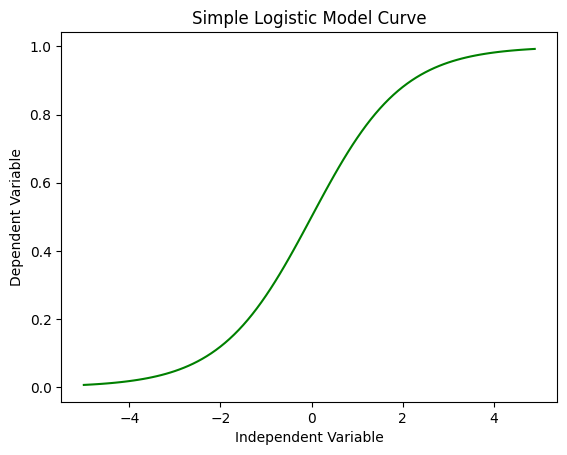

In [17]:
#Plot a simple logistic model curve
X_logistic = np.arange(-5.0, 5.0, 0.1)
Y_logistic = 1.0 / (1.0 + np.exp(-X_logistic))

plt.plot(X_logistic, Y_logistic, color='green') # Orange color for the logistic curve
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.title('Simple Logistic Model Curve')
plt.show()


In [18]:
#Define the sigmoid function
def sigmoid(x, Beta_1, Beta_2):
	y = 1 / (1 + np.exp(-Beta_1 * (x - Beta_2)))
	return y

# Set initial values for logistic function parameters
beta_1_initial = 0.10
beta_2_initial = 1990.0

#Apply logistic function to the data
Y_pred_logistic = sigmoid(x_original, beta_1_initial, beta_2_initial)


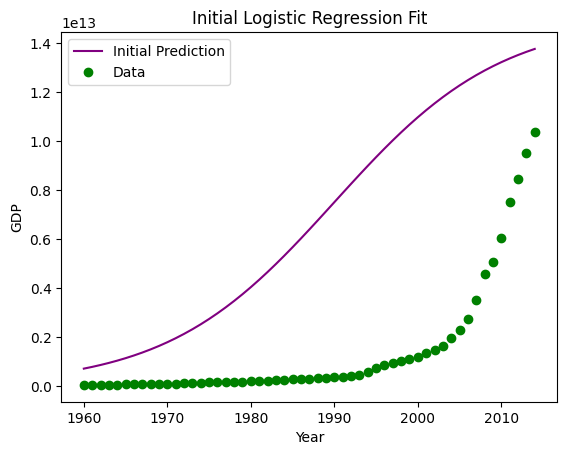

In [19]:
plt.plot(x_original, Y_pred_logistic * 15000000000000., color='purple', label='Initial Prediction')
plt.plot(x_original, y_original, 'go', label='Data')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.legend()
plt.title('Initial Logistic Regression Fit')
plt.show()


In [20]:
# Normalize the data
x_normalized = x_original / max(x_original)
y_normalized = y_original / max(y_original)


In [21]:
from scipy.optimize import curve_fit
# Fit the sigmoid function to the normalized data
popt, pcov = curve_fit(sigmoid, x_normalized, y_normalized)

# Print the final parameters
print("Beta_1 = %f, Beta_2 = %f" % (popt[0], popt[1]))


Beta_1 = 690.451709, Beta_2 = 0.997207


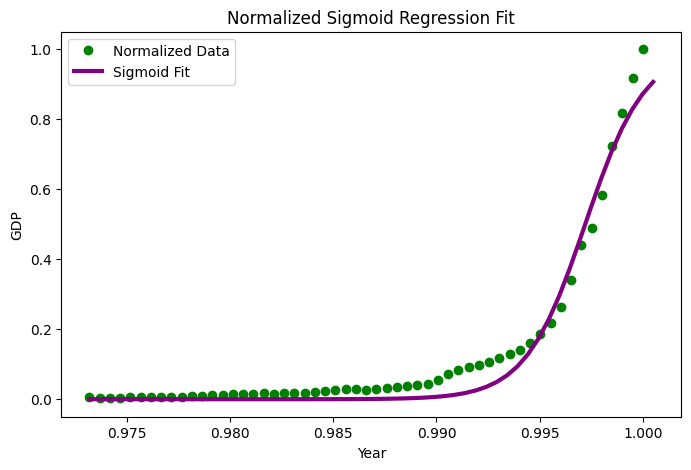

In [22]:
# Create a new x range for the fitted sigmoid curve
x_fit = np.linspace(1960, 2015, 55) / max(x_original)

# Apply the sigmoid function with the fitted parameters
y_fit = sigmoid(x_fit, *popt)

# Plot the normalized data, the sigmoid fit, and the legend
plt.figure(figsize=(8, 5))
plt.plot(x_normalized, y_normalized, 'go', label='Normalized Data') # Changed color to green for data points
plt.plot(x_fit, y_fit, linewidth=3.0, color='purple', label='Sigmoid Fit') # Changed color to purple for the sigmoid fit line
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.title('Normalized Sigmoid Regression Fit')
plt.show()


In [23]:
#Split data into train/test sets
random_mask = np.random.rand(len(df)) < 0.8
train_x = x_normalized[random_mask]
test_x = x_normalized[~random_mask]
train_y = y_normalized[random_mask]
test_y = y_normalized[~random_mask]

#Build the model using the train set
popt_train, pcov_train = curve_fit(sigmoid, train_x, train_y)

#Predict using the test set
y_hat_test = sigmoid(test_x, *popt_train)

#Evaluate the model
mae = mean_absolute_error(test_y, y_hat_test)
mse = np.mean((y_hat_test - test_y) ** 2)
r2 = r2_score(y_hat_test, test_y)

#Print the evaluation metrics
print("Mean Absolute Error: %.2f" % mae)
print("Mean Squared Error: %.2f" % mse)
print("R2-score: %.2f" % r2)


Mean Absolute Error: 0.16
Mean Squared Error: 0.11
R2-score: -24679877748116704530628786257920.00


<ipython-input-23-58ed565fbde0>:9: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_train, pcov_train = curve_fit(sigmoid, train_x, train_y)
